In [1]:
import matplotlib.pyplot as plt
from math import log,exp
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
X = np.loadtxt("NLS_Group05/Class1.txt")
# Y = [0]*len(X)
from math import pi

def prob(mu,cov,x):
    diff = np.subtract(x,mu)
    inside = 0.0
    pro = 1
    for i in range(len(cov)):
        inside += pow(diff[i],2)/cov[i]
        pro *= cov[i]
    inside *= -0.5
    new = pow(2*pi,len(cov))*pro
    new = pow(new,0.5)
    return (exp(inside)/(new*1.0))
       
newX = np.loadtxt("NLS_Group05/Class2.txt")

In [15]:
X = []
for i in range(200000):
    X.append(np.random.choice(5, 32))

print len(X[0])

32


In [22]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            
            print i
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)
            chom = []
            for classification in self.classifications:
                chom.append(len(self.classifications[classification]))
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
#                 print len(self.classifications[classification])
            
#             print chom
            total_error = 0.0
#             print len(self.classifications)
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                for jj in self.classifications[c]:
                    val1 = np.linalg.norm(jj-original_centroid)
                    val2 = np.linalg.norm(jj-current_centroid)
                    total_error += abs(val1-val2)
#                     print val1,val2,total_error
            
#             print total_error
            if (total_error<self.tol):
                break
#             print self.cen/troids

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification



class GMM:
    def __init__(self,X,number_of_sources,iterations,tolerence):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        self.tolerence = tolerence
        self.N = len(self.X)
        self.D = len(self.X[0])
        self.log_likelihoods = [] 
    
    """Define a function which runs for iterations, iterations"""
    def run(self):
        """ 1. Set the initial mu, covariance and pi values"""
        clf = K_Means(self.number_of_sources)
        clf.fit(self.X)
        self.mu = np.array(clf.centroids.values())
        print "End"
        self.cov = np.ones([self.number_of_sources,self.D])
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        self.gamma = np.zeros((len(self.X),self.number_of_sources))
        
        
        """Plot the initial state"""            
        for i in range(self.iterations): 
            
            sum_denom = []
            for i in range(self.N):
                temp = 0.0
                for j in range(self.number_of_sources):
                    temp += self.pi[j]*prob(self.mu[j],self.cov[j],self.X[i])
                sum_denom.append(temp)
            
            for i in range(self.N):
                for j in range(self.number_of_sources):
                    self.gamma[i][j] = self.pi[j]*prob(self.mu[j],self.cov[j],self.X[i])/sum_denom[i]
            
            
            sum2 = []
            for i in range(self.number_of_sources):
                temp = 0.0
                for j in range(self.N):
                    temp += self.gamma[j][i]
                sum2.append(temp)
                            
            for i in range(self.number_of_sources):
                self.pi[i] = sum2[i]/len(self.X)
            
            for i in range(self.number_of_sources):
                tot = np.empty([self.D])
                for j in range(self.N):
                    a = np.array([self.X[j] - self.mu[i]])
                    tot = np.add(tot,self.gamma[j][i] * np.square(a))
                self.cov[i] = tot/(sum2[i]*1.0)
            
            for i in range(self.number_of_sources):
                tot = np.empty([self.D])
                for j in range(self.N):
                    tot += self.gamma[j][i] * self.X[j]
                self.mu[i] = tot/sum2[i]
                                
                    
#             print self.cov
            
            
            chigg = 0.0
            for i in range(len(self.X)):
                for j in range(self.number_of_sources):
                    chigg += self.pi[j] * prob(self.mu[j],self.cov[j],X[i])
            chigg = np.log(chigg)
            self.log_likelihoods.append(chigg)
            try:
                if(self.log_likelihoods[-1]-self.log_likelihoods[-2]<self.tolerence):
                    break
            except:
                pass
            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """
    
    def predict2(self,Y):
        result = []
        count = 0
        for k in Y:
            tot = 0.0
            for i in range(self.number_of_sources):
                m = self.mu[i]
                c = self.cov[i]
                tot += self.pi[i]*prob(m,c,k)
            
            result.append(log(tot))
            count+=1
        return np.array(result)
    
    



In [ ]:
GMM1 = GMM(X,16,100,0.001)     
GMM1.run()
# GMM2 = GMM(newX,16,100,0.001)
# GMM2.run()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [78]:
x_min1, x_max1 = X[:,0].min() - .5, X[:,0].max() + .5
y_min1, y_max1 = X[:,1].min() - .5, X[:,1].max() + .5
x_min2, x_max2 = newX[:,0].min() - .5, newX[:,0].max() + .5
y_min2, y_max2 = newX[:,1].min() - .5, newX[:,1].max() + .5
x_min = min(x_min1,x_min2)
y_min = min(y_min1,y_min2)
x_max = max(x_max1,x_max2)
y_max = max(y_max1,y_max2)
h = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = GMM1.predict2(np.c_[xx.ravel(), yy.ravel()])
Z2 = GMM2.predict2(np.c_[xx.ravel(), yy.ravel()])

In [79]:
Z = []
for i in range(len(Z1)):
    if(Z1[i]>Z2[i]):
        Z.append(0)
    else:
        Z.append(1)
        

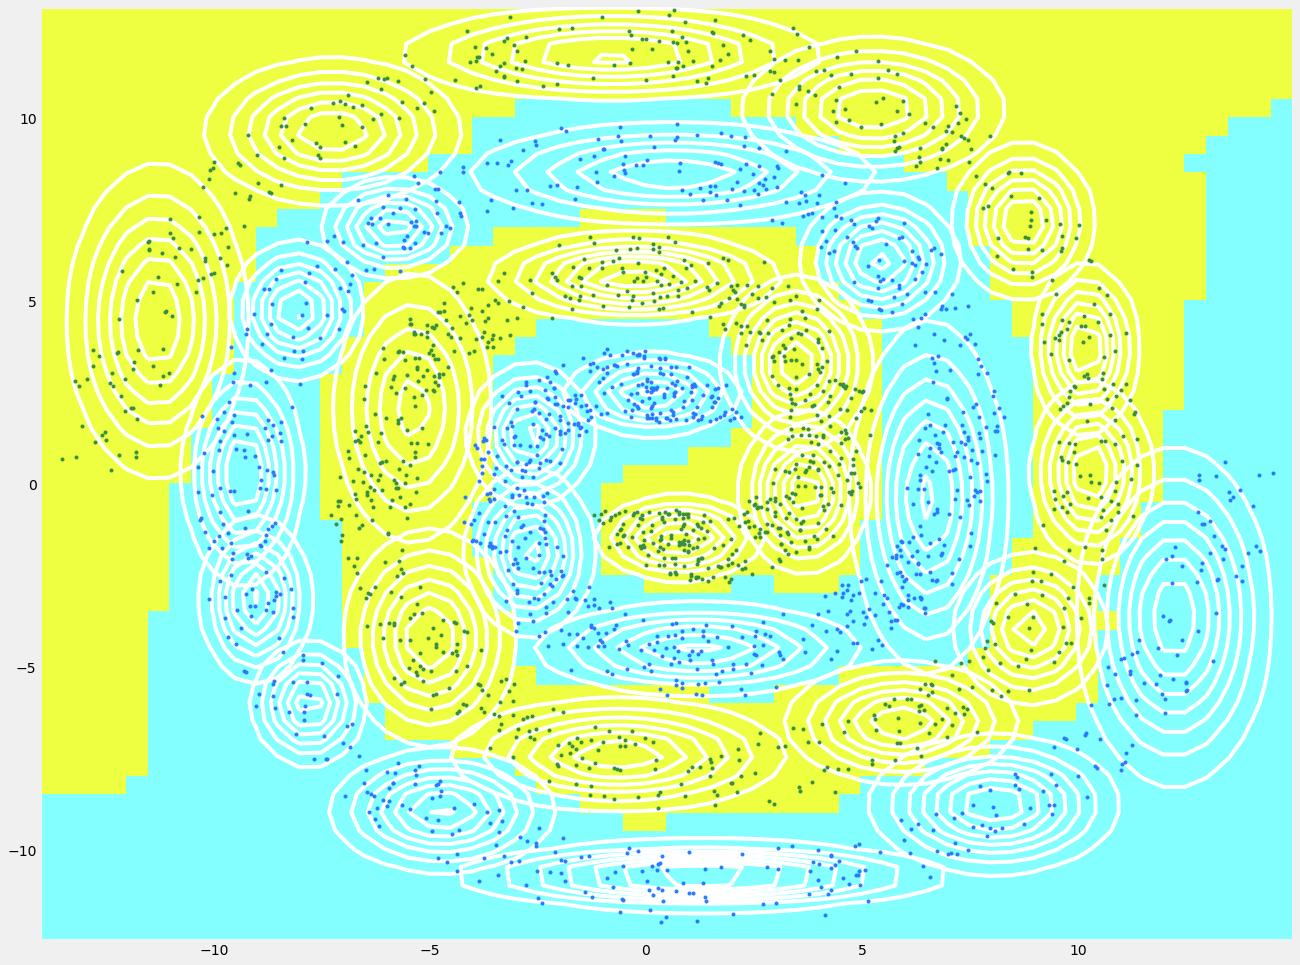

In [80]:
Z = np.array(Z)
import matplotlib.mlab as mlab 
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = [20, 16]
from matplotlib import colors
cmap = colors.ListedColormap(["#84FFFF", "#EEFF41"])
plt.pcolormesh(xx, yy, Z,cmap=cmap)
plt.plot(X[:,0], X[:,1],"#2979FF",zorder=10,marker=".",linestyle="None")
plt.plot(newX[:,0], newX[:,1],"#388E3C",zorder=10,marker=".",linestyle="None")
for i in range(GMM1.number_of_sources):
    cov = GMM1.cov[i]
    sigmax=pow(cov[0],0.5)
    sigmay=pow(cov[1],0.5)
    mux=GMM1.mu[i][0]
    muy=GMM1.mu[i][1]
    sigmaxy = 0
    Z2 = mlab.bivariate_normal(xx, yy, sigmax, sigmay, mux, muy,sigmaxy)
    plt.contour(xx, yy, Z2,zorder=10,colors="white")
for i in range(GMM2.number_of_sources):
    cov = GMM2.cov[i]
    sigmax=pow(cov[0],0.5)
    sigmay=pow(cov[1],0.5)
    mux=GMM2.mu[i][0]
    muy=GMM2.mu[i][1]
    sigmaxy = 0
    Z2 = mlab.bivariate_normal(xx, yy, sigmax, sigmay, mux, muy,sigmaxy)
    plt.contour(xx, yy, Z2,zorder=10,colors="white")
plt.show()

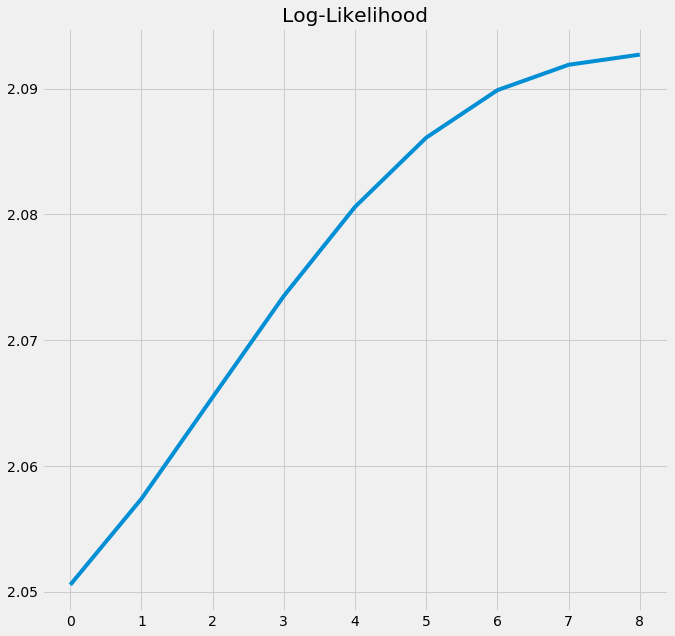

In [81]:
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(GMM1.log_likelihoods)
plt.show()